# Water Quality Prediction Project

### Import packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pickle
import funzioni as fn

plt.rcParams.update({'xtick.color' : 'black', 
                     'ytick.color' : 'black', 
                     'axes.labelcolor' : 'black', 
                     'axes.edgecolor' : 'black', 
                     'figure.facecolor' : 'white', 
                     'axes.facecolor' : '#f7ead4', 
                     'axes.grid' : True, 
                     'axes.axisbelow' : True, 
                     'grid.color' : 'white'})

### Load the .csv file into a Dataframe

In [2]:
df = pd.read_csv('csv\Water_Quality_Prediction.csv')
# drop the index
df.set_index('Index', inplace = True)

## Do some primordial EDA on the dataframe

In [3]:
df.head(5)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [4]:
df.shape

(1048575, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   pH                      1028344 non-null  float64
 1   Iron                    1041584 non-null  float64
 2   Nitrate                 1029880 non-null  float64
 3   Chloride                1017741 non-null  float64
 4   Lead                    1043891 non-null  float64
 5   Zinc                    1020900 non-null  float64
 6   Color                   1047594 non-null  object 
 7   Turbidity               1039881 non-null  float64
 8   Fluoride                1015357 non-null  float64
 9   Copper                  1013693 non-null  float64
 10  Odor                    1017243 non-null  float64
 11  Sulfate                 1014050 non-null  float64
 12  Conductivity            1019772 non-null  float64
 13  Chlorine                1038413 non-null  float64
 14  Mangane

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1028344.0,7.449869,0.847846,2.058008e+00,6.914812e+00,7.452940e+00,8.001406e+00,12.891960
Iron,1041584.0,0.113965,0.443319,2.050000e-53,8.950000e-06,2.054149e-03,4.977795e-02,15.748603
Nitrate,1029880.0,6.078584,3.131874,2.861727e-01,3.952811e+00,5.564798e+00,7.584930e+00,73.072931
Chloride,1017741.0,181.865998,65.766569,2.941350e+01,1.374347e+02,1.747464e+02,2.156446e+02,1430.548852
Lead,1043891.0,0.001292,0.030301,0.000000e+00,8.290000e-123,1.520000e-62,2.820000e-27,3.503948
Zinc,1020900.0,1.528928,1.505436,6.350000e-07,4.127921e-01,1.074800e+00,2.214154e+00,28.368672
Turbidity,1039881.0,0.483591,0.861474,1.410000e-14,3.692472e-02,1.997574e-01,5.928613e-01,19.296113
Fluoride,1015357.0,0.941014,0.792490,4.550000e-06,3.706065e-01,7.654291e-01,1.318265e+00,12.851710
Copper,1013693.0,0.493944,0.566243,2.100000e-09,1.260900e-01,3.389322e-01,6.789152e-01,11.390555
Odor,1017243.0,1.772788,1.051316,1.100125e-02,8.772584e-01,1.744323e+00,2.611824e+00,4.141991


In [7]:
df.isnull().sum()

pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

Drop the columns that don't interfeer in the potability of the water and rename the remaining columns so they are more accessible for the analysis done later

In [8]:
df.drop(['Day', 'Time of Day', 'Month', 'Water Temperature', 'Air Temperature', 'Source', 'Lead'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Zinc', 'Color', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine',
       'Manganese', 'Total Dissolved Solids', 'Target'],
      dtype='object')

In [10]:
df.columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total_Diss_Solids', 'Potability']

Let's see how our dataframe looks like now

In [11]:
df.head()

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total_Diss_Solids,Potability
Index,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.270000e-15,332.118789,0
1,6.917863,0.000081,3.734167,227.029851,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,0
2,5.443762,0.020106,3.816994,230.995630,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,0
3,7.955339,0.143988,8.224944,178.129940,4.027879,Near Colorless,0.166319,0.208454,0.239451,NaN,147.163233,237.028468,3.516907,2.468295e-02,100.043838,0
4,8.091909,0.002167,9.925788,186.540872,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,0


### Encoding 'Color' variable

For the prediction model used later on, we need to have numeric variables and right now we have some columns that have string values.

In [12]:
df['Color'].value_counts().index

Index(['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow',
       'Yellow'],
      dtype='object', name='Color')

In [13]:
df['Color'].replace({'Colorless' : 0,
                     'Near Colorless' : 1,
                     'Faint Yellow' : 2,
                     'Light Yellow' : 3,
                     'Yellow' : 4}, inplace = True)

df['Color'].value_counts()

Color
0.0    326033
1.0    325799
2.0    188039
3.0    124775
4.0     82948
Name: count, dtype: int64

In [14]:
colors = sns.color_palette('pastel')[0:5]
fig = px.pie(values = df['Color'].value_counts(), 
             names = ['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow', 'Yellow'], 
             color_discrete_sequence = px.colors.qualitative.Pastel, 
             title = 'Pie chart of the "Color" attribute', 
             hole = 0.5,
             opacity = 0.9,
             width = 700, height = 500)
fig.update_traces(marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

## Some graphs for better understanding of our dataset

Boxplots of the variables of the dataframe. The "hue" parameter is set to "Potability".

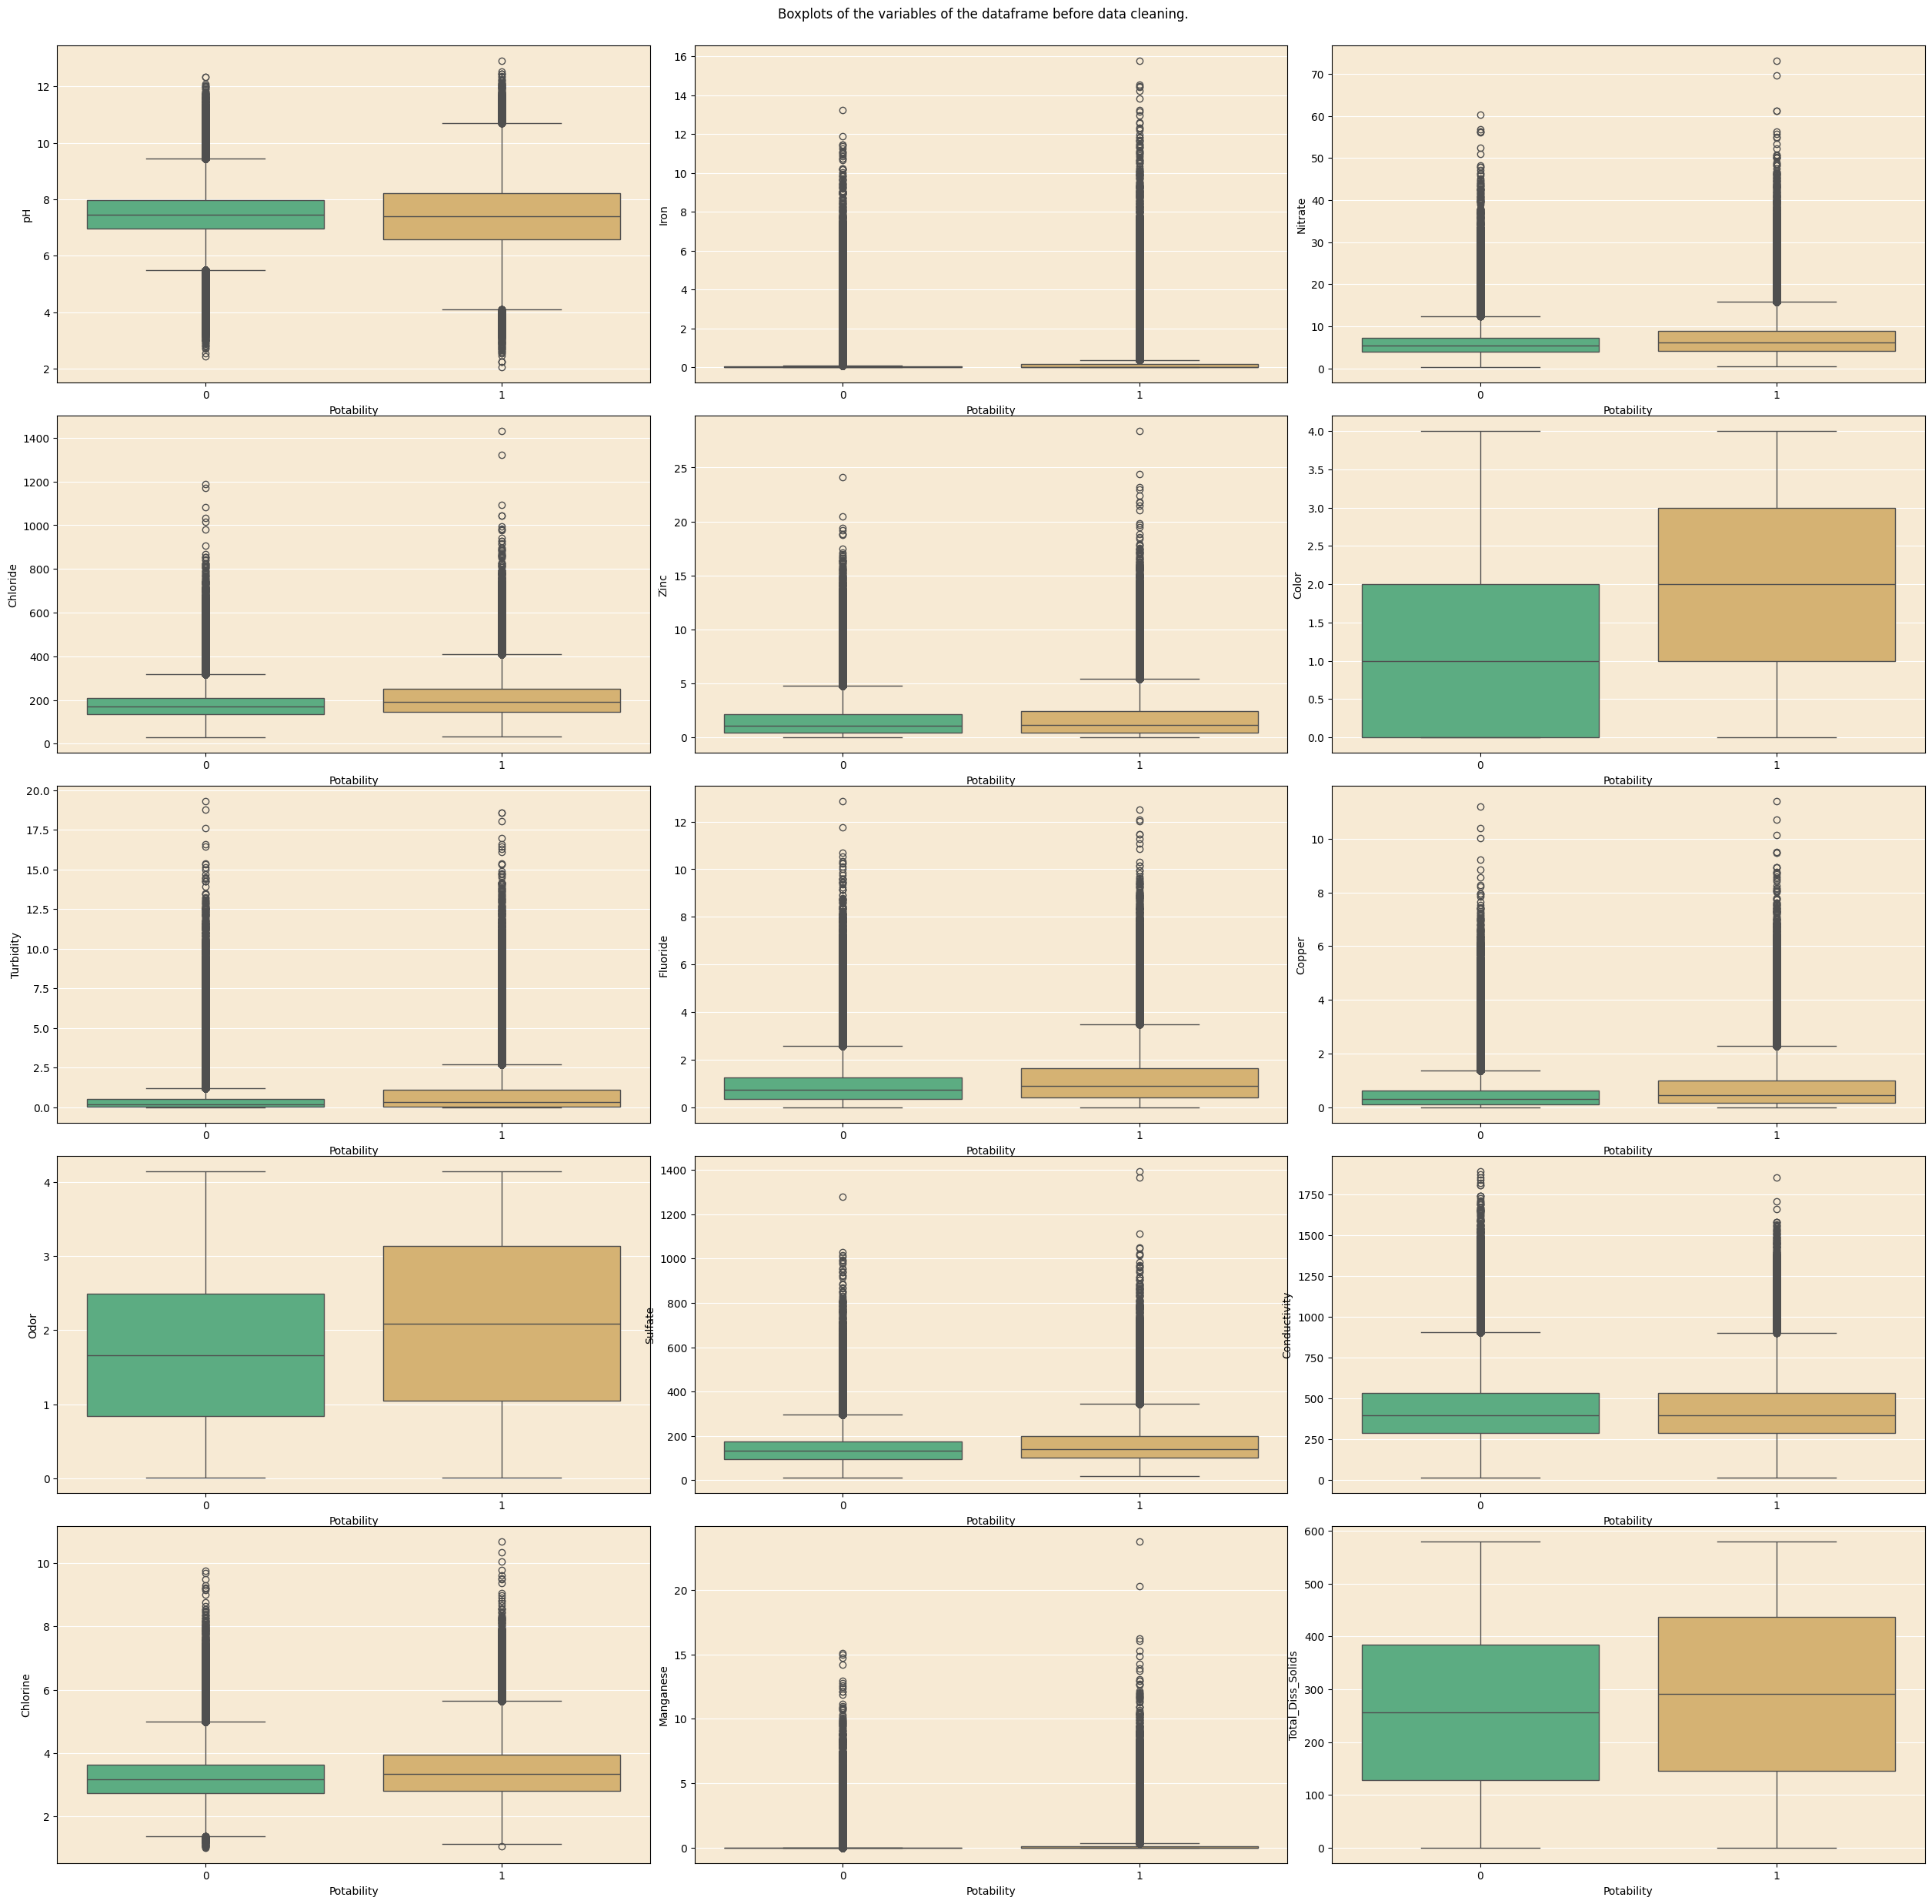

In [15]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
palette1 = ['#4eba81', '#e5b663']
plt.suptitle('Boxplots of the variables of the dataframe before data cleaning.')
fig_1.tight_layout()
fig_1.subplots_adjust(top = 0.96)

sns.boxplot(x = df['Potability'], y = df['pH'], data = df, ax = axes[0][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Iron'], data = df, ax = axes[0][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Nitrate'], data = df, ax = axes[0][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Chloride'], data = df, ax = axes[1][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Zinc'], data = df, ax = axes[1][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Color'], data = df, ax = axes[1][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Turbidity'], data = df, ax = axes[2][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Fluoride'], data = df, ax = axes[2][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Copper'], data = df, ax = axes[2][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Odor'], data = df, ax = axes[3][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Sulfate'], data = df, ax = axes[3][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Conductivity'], data = df, ax = axes[3][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Chlorine'], data = df, ax = axes[4][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Manganese'], data = df, ax = axes[4][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Total_Diss_Solids'], data = df, ax = axes[4][2], palette = palette1, hue = df['Potability'], legend = False)

plt.show()

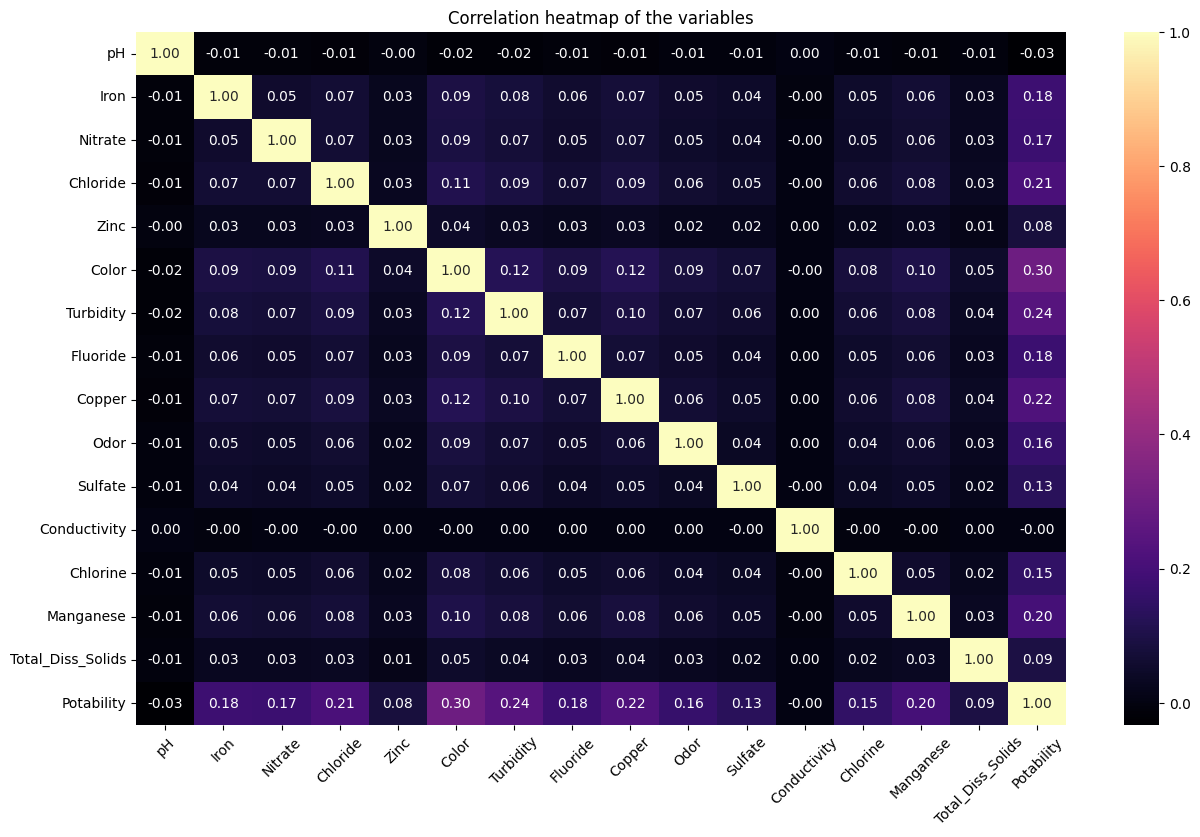

In [16]:
df_corr = df.corr()
plt.figure(figsize = (15, 9))
plt.title('Correlation heatmap of the variables')
sns.heatmap(df_corr, annot = True, cmap = 'magma', fmt = '.2f')
plt.xticks(rotation = 45)
plt.show()

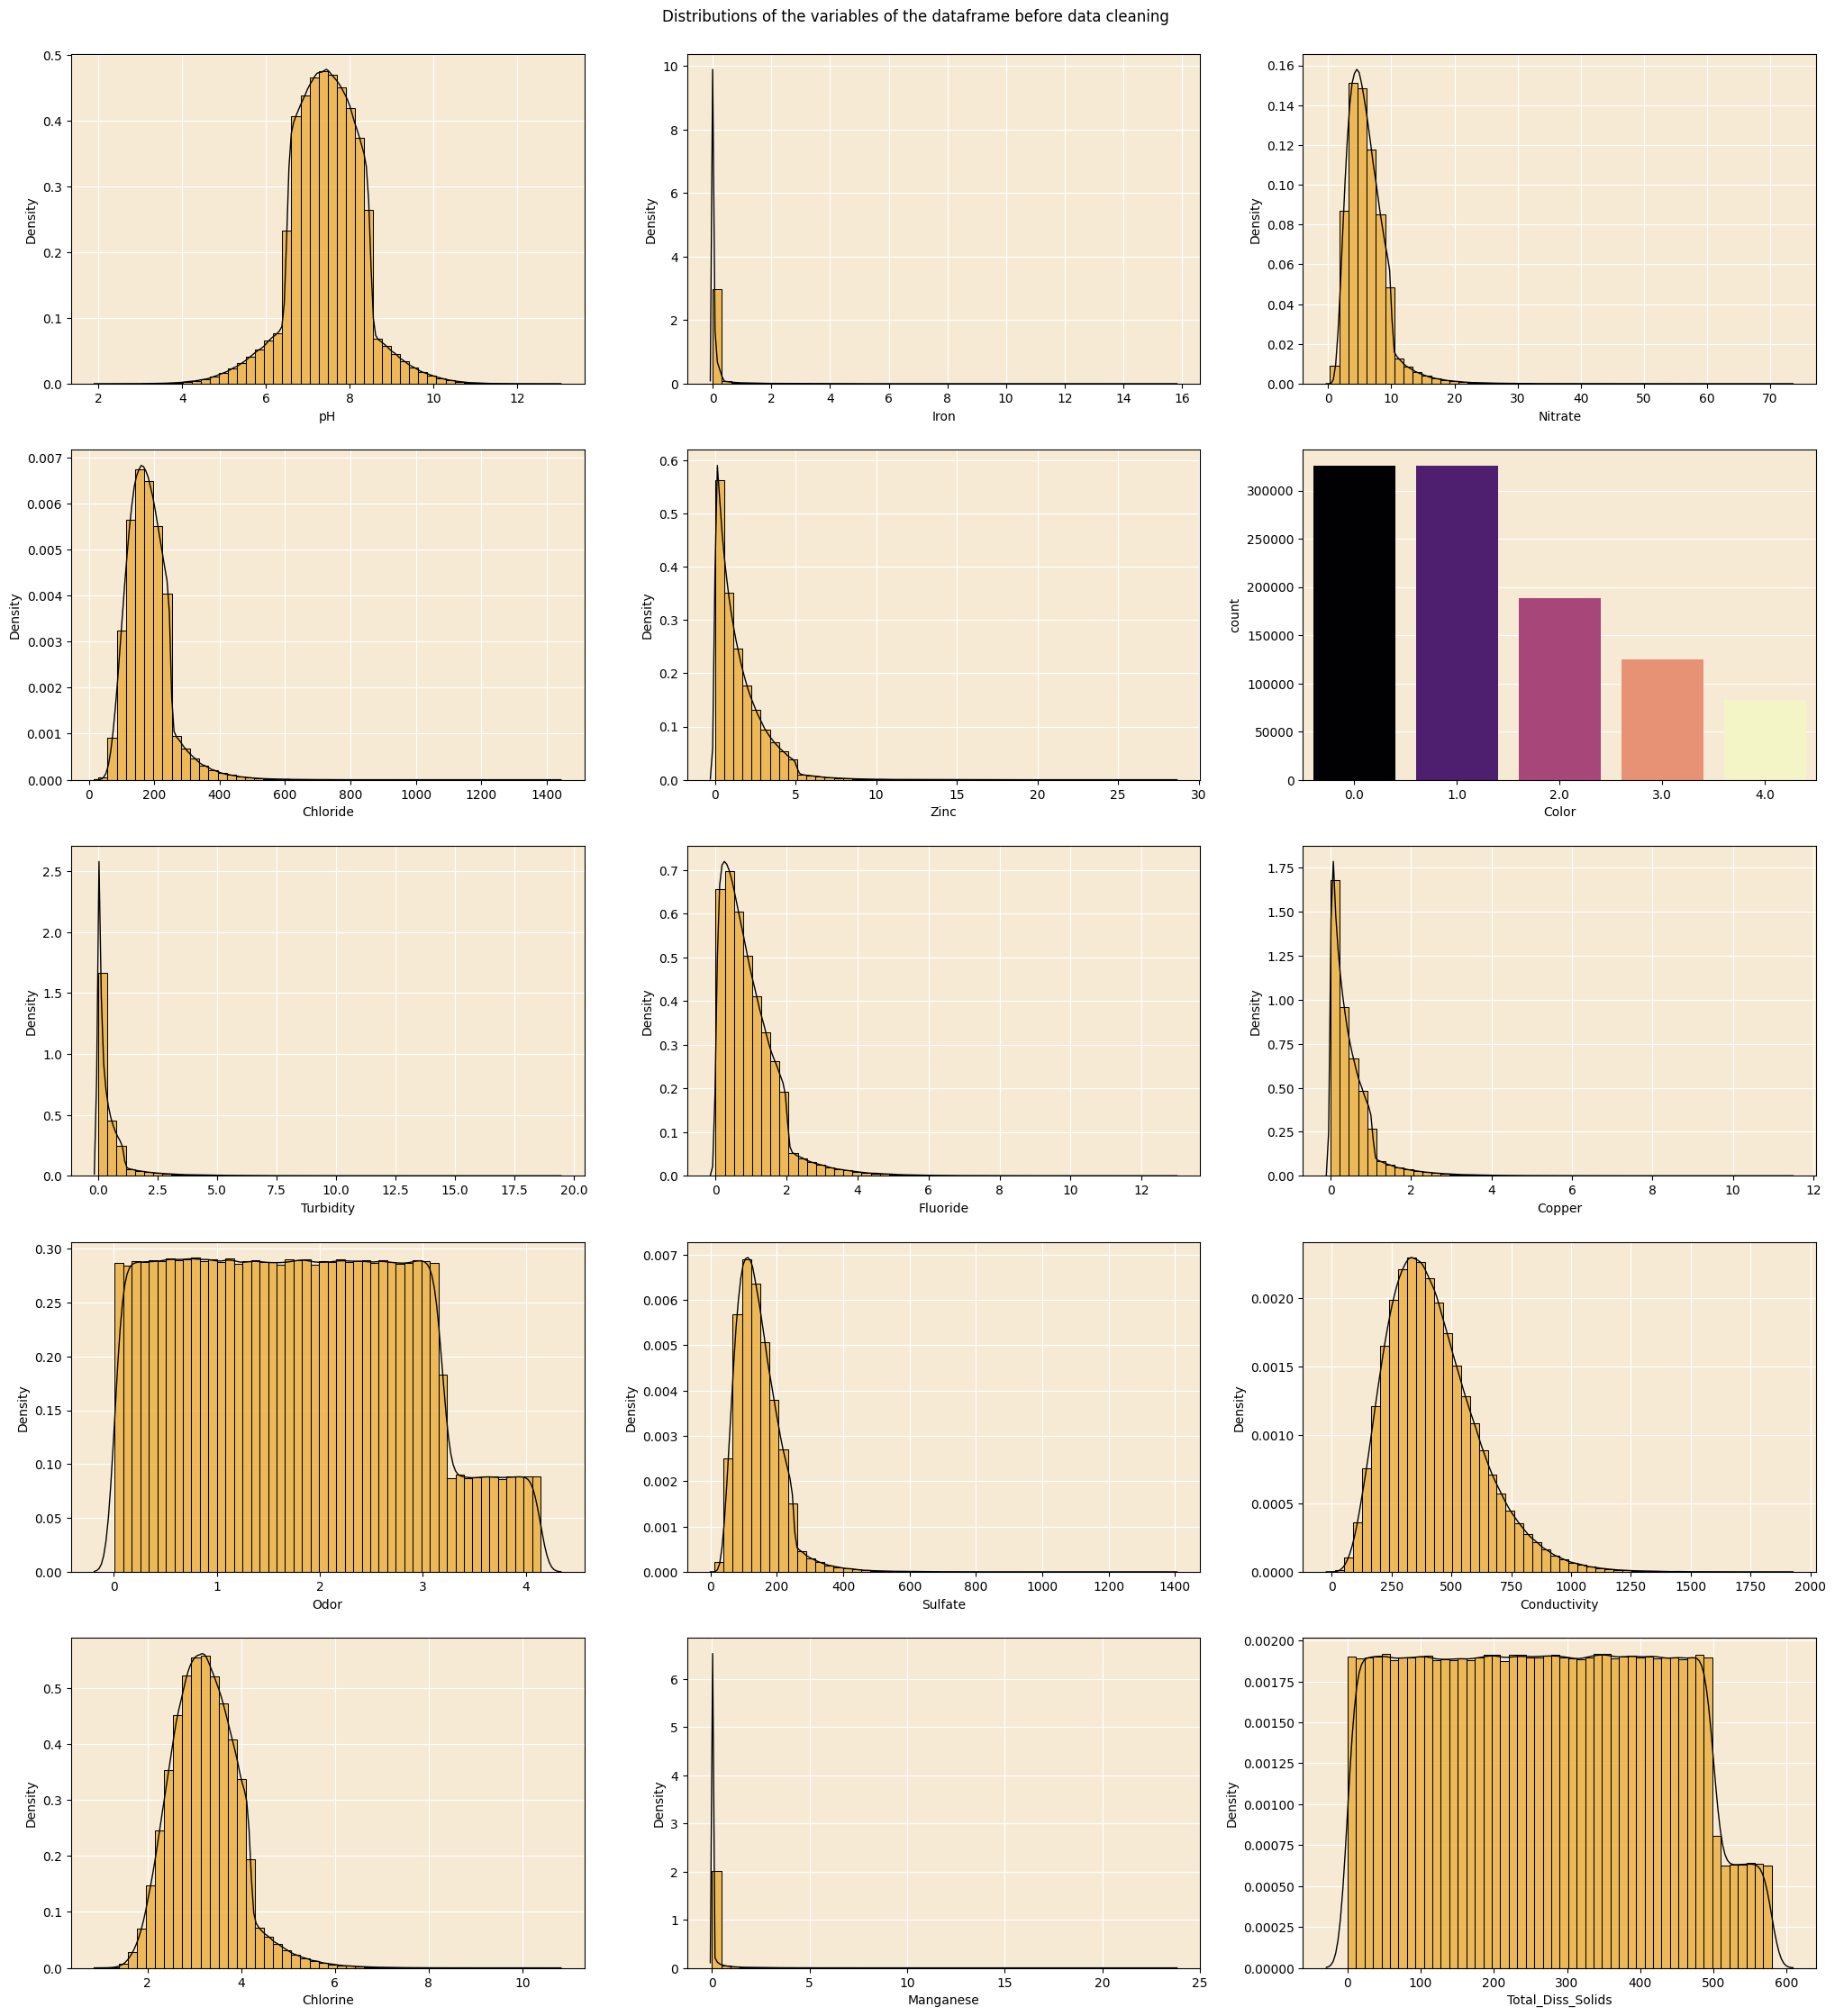

In [17]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
plt.suptitle('Distributions of the variables of the dataframe before data cleaning')
fig_1.subplots_adjust(top = 0.96)

sns.histplot(data = df['pH'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][0])
sns.kdeplot(data = df['pH'], color = 'black', ax = axes[0][0], linewidth = 1)
sns.histplot(data = df['Iron'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][1])
sns.kdeplot(data = df['Iron'], color = 'black', ax = axes[0][1], linewidth = 1)
sns.histplot(data = df['Nitrate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][2])
sns.kdeplot(data = df['Nitrate'], color = 'black', ax = axes[0][2], linewidth = 1)
sns.histplot(data = df['Chloride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][0])
sns.kdeplot(data = df['Chloride'], color = 'black', ax = axes[1][0], linewidth = 1)
sns.histplot(data = df['Zinc'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][1])
sns.kdeplot(data = df['Zinc'], color = 'black', ax = axes[1][1], linewidth = 1)
sns.barplot(x = df['Color'].value_counts().index, y = df['Color'].value_counts(), hue = df['Color'].value_counts().index, legend = False, palette = 'magma', ax = axes[1][2])
sns.histplot(data = df['Turbidity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][0])
sns.kdeplot(data = df['Turbidity'], color = 'black', ax = axes[2][0], linewidth = 1)
sns.histplot(data = df['Fluoride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][1])
sns.kdeplot(data = df['Fluoride'], color = 'black', ax = axes[2][1], linewidth = 1)
sns.histplot(data = df['Copper'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][2])
sns.kdeplot(data = df['Copper'], color = 'black', ax = axes[2][2], linewidth = 1)
sns.histplot(data = df['Odor'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][0])
sns.kdeplot(data = df['Odor'], color = 'black', ax = axes[3][0], linewidth = 1)
sns.histplot(data = df['Sulfate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][1])
sns.kdeplot(data = df['Sulfate'], color = 'black', ax = axes[3][1], linewidth = 1)
sns.histplot(data = df['Conductivity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][2])
sns.kdeplot(data = df['Conductivity'], color = 'black', ax = axes[3][2], linewidth = 1)
sns.histplot(data = df['Chlorine'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][0])
sns.kdeplot(data = df['Chlorine'], color = 'black', ax = axes[4][0], linewidth = 1)
sns.histplot(data = df['Manganese'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][1])
sns.kdeplot(data = df['Manganese'], color = 'black', ax = axes[4][1], linewidth = 1)
sns.histplot(data = df['Total_Diss_Solids'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][2])
sns.kdeplot(data = df['Total_Diss_Solids'], color = 'black', ax = axes[4][2], linewidth = 1)

plt.show()

## Replacing null values

In [18]:
df.isnull().sum().sum()

306660

We can see that inside the dataframe, there are quite a lot of null values. The next portion of the project is concentrated around filling these na's with the most appropriate value, taking in consideration the distributions of the various variables inside the dataframe.

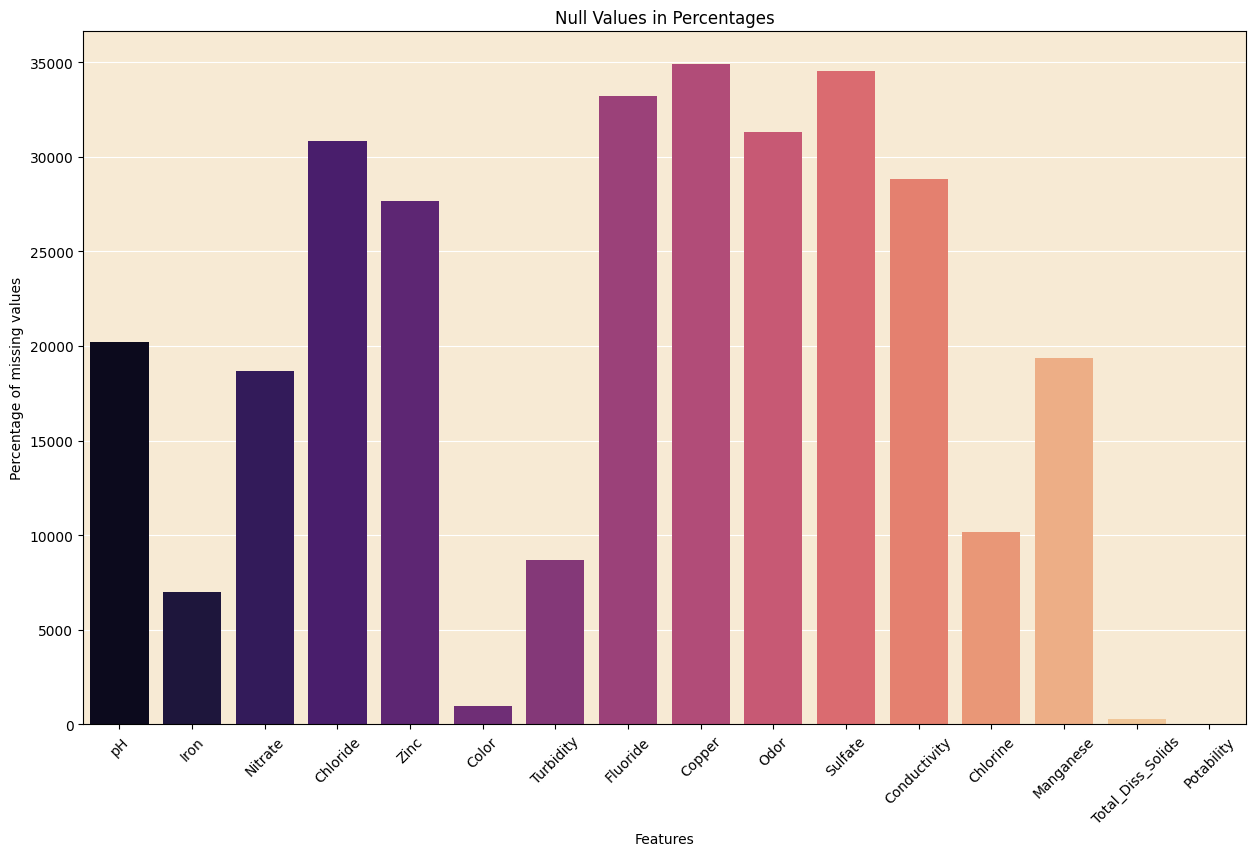

In [19]:
plt.figure(figsize = (15, 9))
sns.barplot(x = df.isnull().sum().index, y = df.isnull().sum(), hue = df.isnull().sum().index, legend = False, palette = 'magma')
plt.xlabel('Features') 
plt.ylabel('Percentage of missing values')
plt.title('Null Values in Percentages')
plt.xticks(rotation = 45)
plt.show()

# PCA, TSNE

#### Normal distributions

In [20]:
print(f"pH null values: {df['pH'].isnull().sum()}")
print(f"Chloride null values: {df['Chloride'].isnull().sum()}")
print(f"Sulfate null values: {df['Sulfate'].isnull().sum()}")
print(f"Conductivity null values: {df['Conductivity'].isnull().sum()}")
print(f"Chlorine null values: {df['Chlorine'].isnull().sum()}")
print(f"Nitrate null values: {df['Nitrate'].isnull().sum()}")

pH null values: 20231
Chloride null values: 30834
Sulfate null values: 34525
Conductivity null values: 28803
Chlorine null values: 10162
Nitrate null values: 18695


In [21]:
for target in ['pH', 'Chloride', 'Sulfate', 'Conductivity', 'Chlorine', 'Nitrate']:
    fn.na_to_norm_distr(df, target)

#### Uniform distributions

In [22]:
print(f"Odor null values: {df['Odor'].isnull().sum()}")
print(f"Total_Diss_Solids null values: {df['Total_Diss_Solids'].isnull().sum()}")


Odor null values: 31332
Total_Diss_Solids null values: 298


In [23]:
for target in ['Odor', 'Total_Diss_Solids']:
    fn.na_to_unif_distr(df, target)

#### Filling with median considering the potability

For the following variables, I couldn't trace back their distributions to a normal or a uniform, so I'll fill the null values with the median for potability 0 and potability 1

In [24]:
print(f"Iron null values: {df['Iron'].isnull().sum()}")
print(f"Median for Iron, Potability 0: {fn.median_col_in_target(df, 'Iron')[0]}\nMedian for Iron, Potability 1: {fn.median_col_in_target(df, 'Iron')[1]}")
print('--------')
print(f"Color null values: {df['Color'].isnull().sum()}")
print(f"Median for Color, Potability 0: {fn.median_col_in_target(df, 'Color')[0]}\nMedian for Color, Potability 1: {fn.median_col_in_target(df, 'Color')[1]}")
print('--------')
print(f"Turbidity null values: {df['Turbidity'].isnull().sum()}")
print(f"Median for Turbidity, Potability 0: {fn.median_col_in_target(df, 'Turbidity')[0]}\nMedian for Turbidity, Potability 1: {fn.median_col_in_target(df, 'Turbidity')[1]}")
print('--------')
print(f"Manganese null values: {df['Manganese'].isnull().sum()}")
print(f"Median for Manganese, Potability 0: {fn.median_col_in_target(df, 'Manganese')[0]}\nMedian for Manganese, Potability 1: {fn.median_col_in_target(df, 'Manganese')[1]}")
print('--------')
print(f"Zinc null values: {df['Zinc'].isnull().sum()}")
print(f"Median for Zinc, Potability 0: {fn.median_col_in_target(df, 'Zinc')[0]}\nMedian for Zinc, Potability 1: {fn.median_col_in_target(df, 'Zinc')[1]}")
print('--------')
print(f"Fluoride null values: {df['Fluoride'].isnull().sum()}")
print(f"Median for Fluoride, Potability 0: {fn.median_col_in_target(df, 'Fluoride')[0]}\nMedian for Fluoride, Potability 1: {fn.median_col_in_target(df, 'Fluoride')[1]}")
print('--------')
print(f"Copper null values: {df['Copper'].isnull().sum()}")
print(f"Median for Copper, Potability 0: {fn.median_col_in_target(df, 'Copper')[0]}\nMedian for Copper, Potability 1: {fn.median_col_in_target(df, 'Copper')[1]}")

Iron null values: 6991
Median for Iron, Potability 0: 0.001550039
Median for Iron, Potability 1: 0.005783678
--------
Color null values: 981
Median for Color, Potability 0: 1.0
Median for Color, Potability 1: 2.0
--------
Turbidity null values: 8694
Median for Turbidity, Potability 0: 0.174913841
Median for Turbidity, Potability 1: 0.3342622635
--------
Manganese null values: 19339
Median for Manganese, Potability 0: 0.00030392150000000003
Median for Manganese, Potability 1: 0.00514679
--------
Zinc null values: 27675
Median for Zinc, Potability 0: 1.055227688
Median for Zinc, Potability 1: 1.146205722
--------
Fluoride null values: 33218
Median for Fluoride, Potability 0: 0.734067553
Median for Fluoride, Potability 1: 0.8974966045
--------
Copper null values: 34882
Median for Copper, Potability 0: 0.3146554735
Median for Copper, Potability 1: 0.453891481


In [25]:
for target in ['Iron', 'Color', 'Turbidity', 'Manganese', 'Zinc', 'Fluoride', 'Copper']:
    fn.na_to_median_target(df, target)

### Outlier deletion

In [26]:
for target in ['Iron', 'Nitrate', 'Chloride', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total_Diss_Solids']:
    df = fn.outl_del(df, target, 0.99, 0.01)

In [27]:
df.isnull().sum()

pH                   0
Iron                 0
Nitrate              0
Chloride             0
Zinc                 0
Color                0
Turbidity            0
Fluoride             0
Copper               0
Odor                 0
Sulfate              0
Conductivity         0
Chlorine             0
Manganese            0
Total_Diss_Solids    0
Potability           0
dtype: int64

## Let's see how our has dataframe has changed

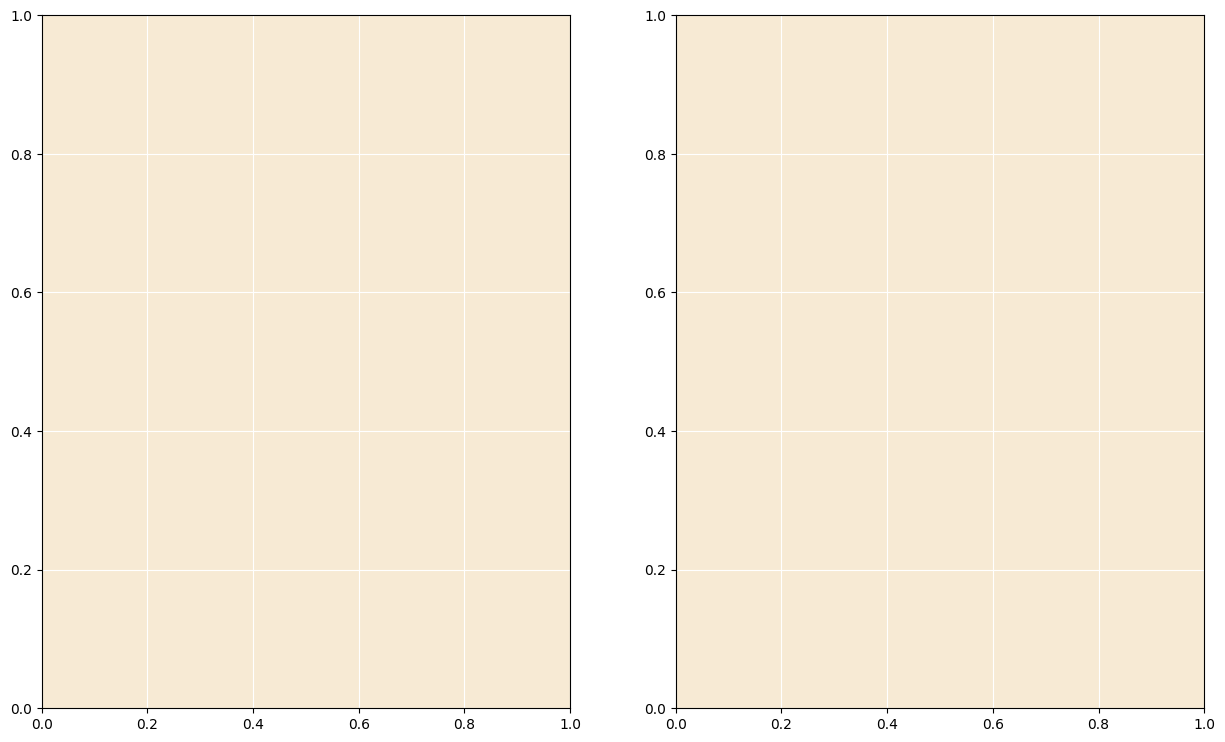

In [28]:
fig_1, axes = plt.subplots(1, 2, figsize=(15, 9))


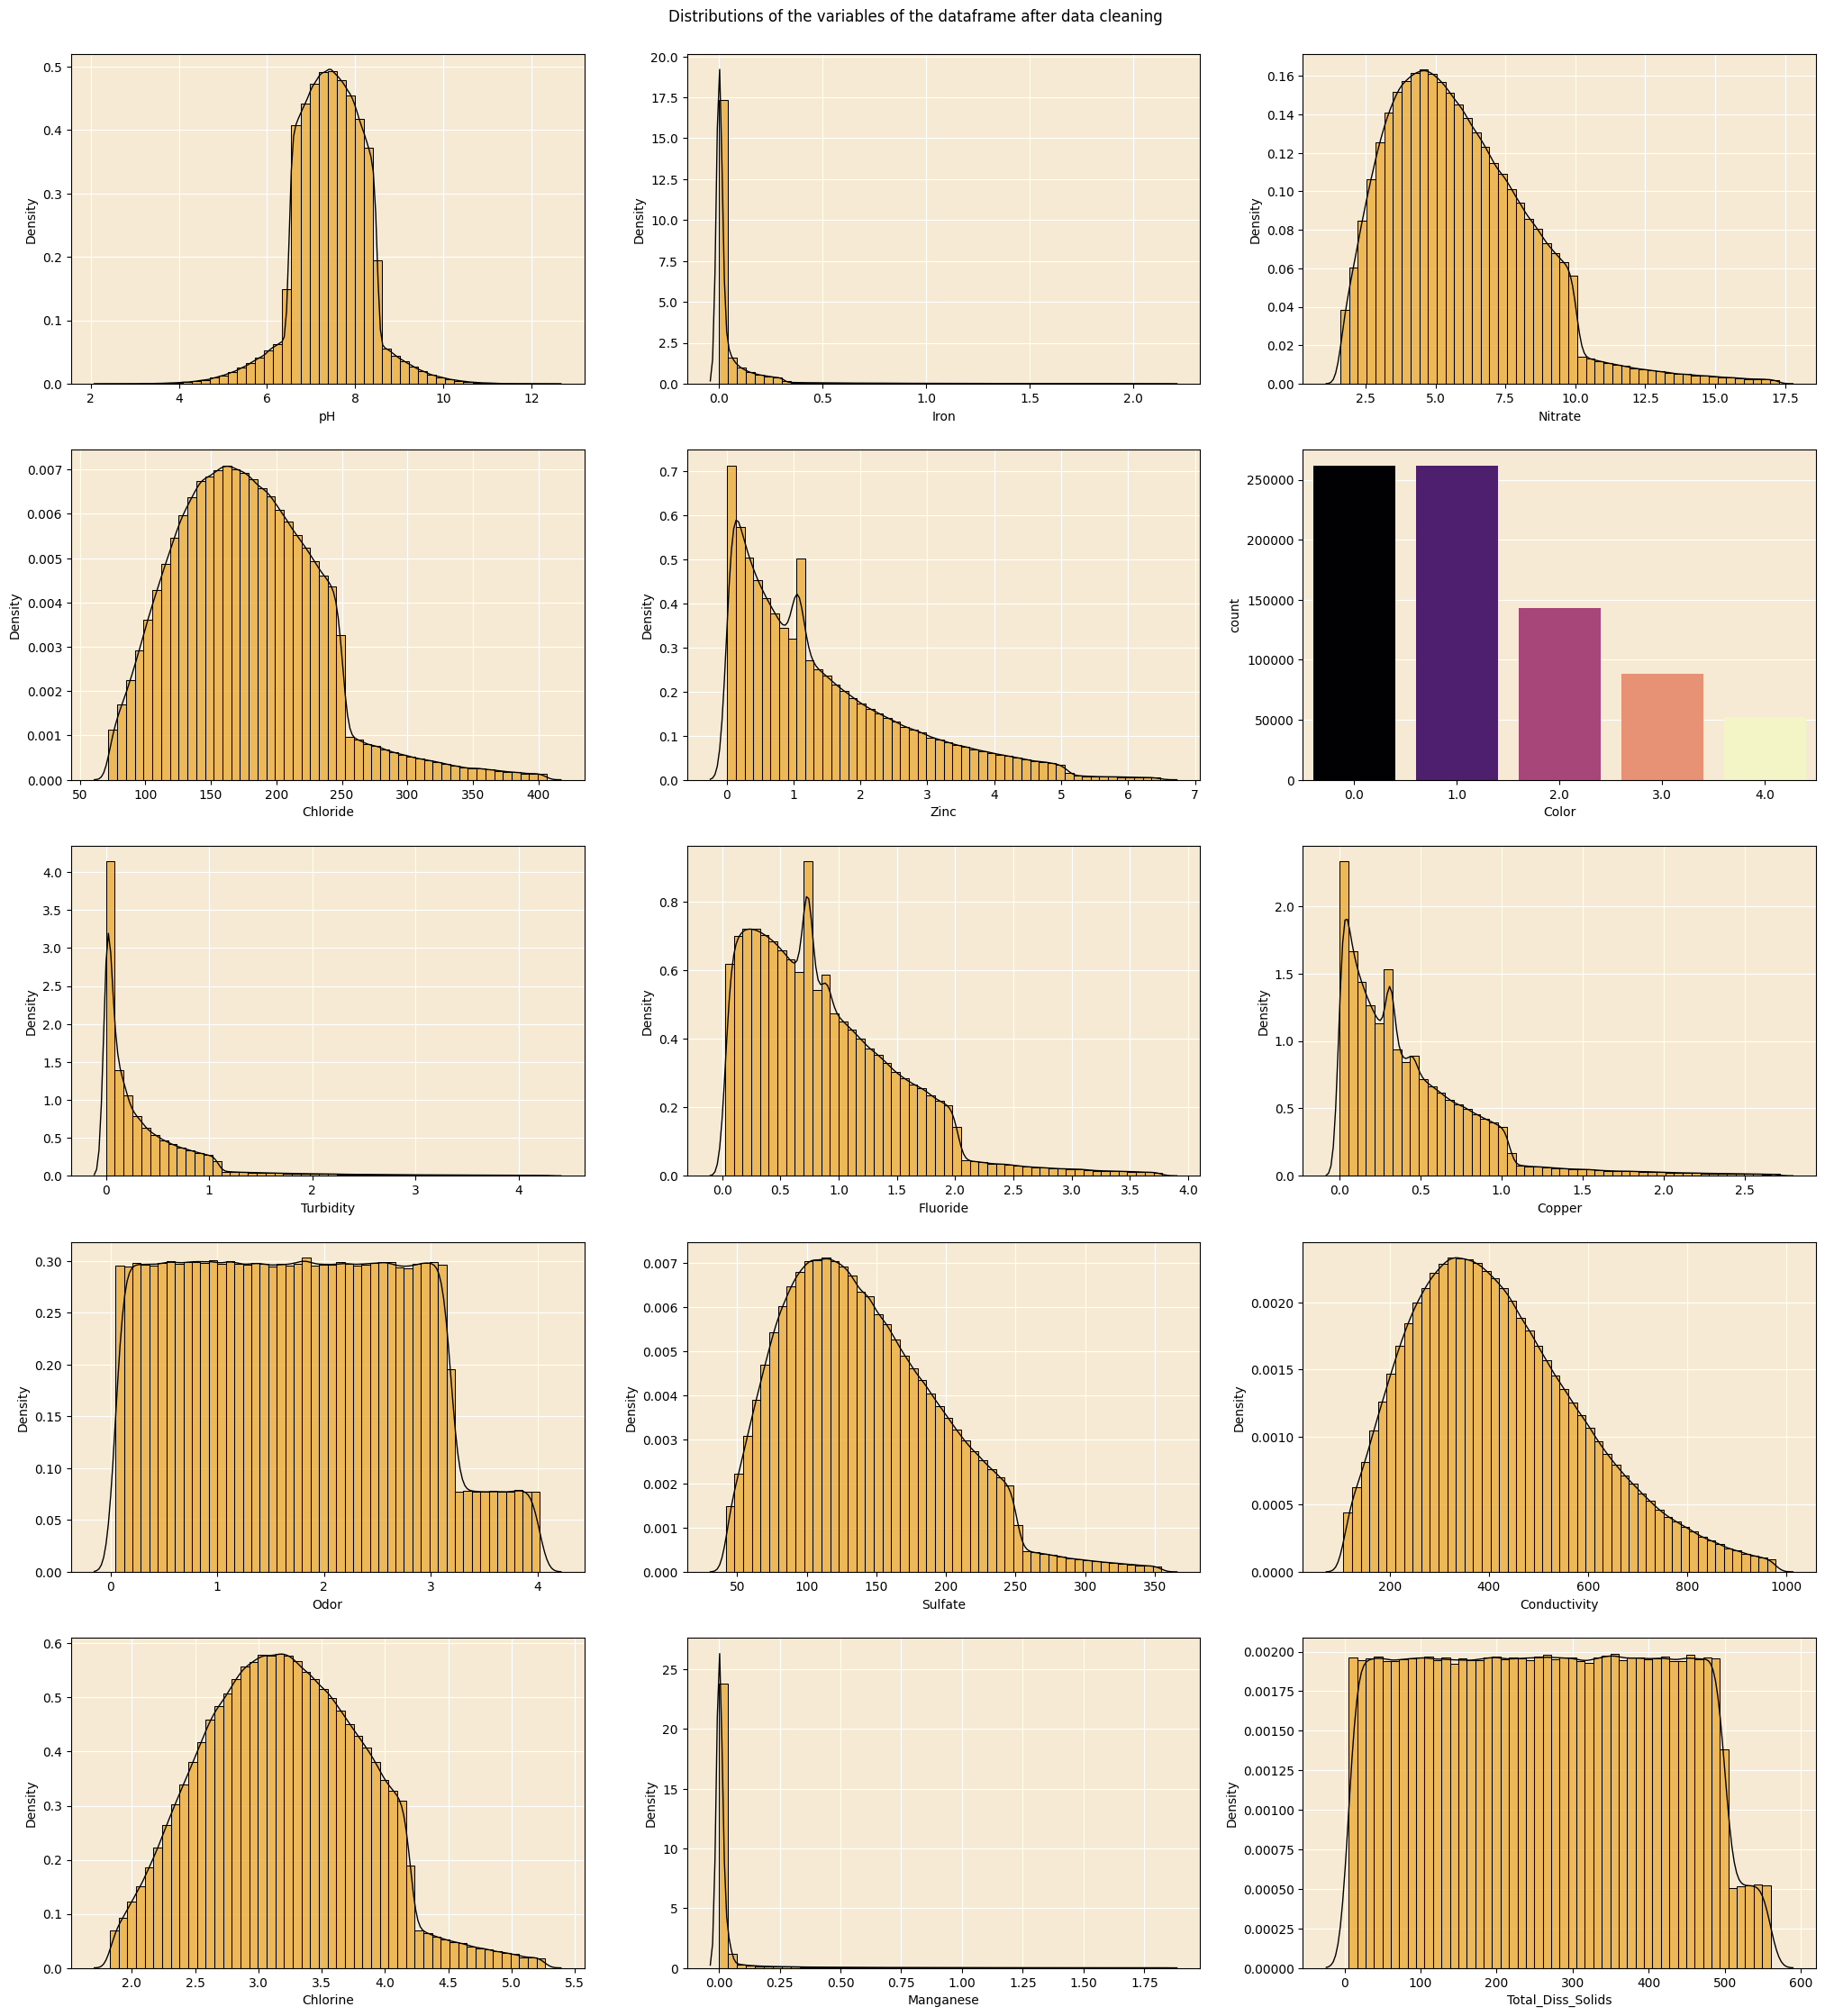

In [29]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
plt.suptitle('Distributions of the variables of the dataframe after data cleaning')
fig_1.subplots_adjust(top = 0.96)

sns.histplot(data = df['pH'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][0])
sns.kdeplot(data = df['pH'], color = 'black', ax = axes[0][0], linewidth = 1)
sns.histplot(data = df['Iron'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][1])
sns.kdeplot(data = df['Iron'], color = 'black', ax = axes[0][1], linewidth = 1)
sns.histplot(data = df['Nitrate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][2])
sns.kdeplot(data = df['Nitrate'], color = 'black', ax = axes[0][2], linewidth = 1)
sns.histplot(data = df['Chloride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][0])
sns.kdeplot(data = df['Chloride'], color = 'black', ax = axes[1][0], linewidth = 1)
sns.histplot(data = df['Zinc'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][1])
sns.kdeplot(data = df['Zinc'], color = 'black', ax = axes[1][1], linewidth = 1)
sns.barplot(x = df['Color'].value_counts().index, y = df['Color'].value_counts(), hue = df['Color'].value_counts().index, legend = False, palette = 'magma', ax = axes[1][2])
sns.histplot(data = df['Turbidity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][0])
sns.kdeplot(data = df['Turbidity'], color = 'black', ax = axes[2][0], linewidth = 1)
sns.histplot(data = df['Fluoride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][1])
sns.kdeplot(data = df['Fluoride'], color = 'black', ax = axes[2][1], linewidth = 1)
sns.histplot(data = df['Copper'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][2])
sns.kdeplot(data = df['Copper'], color = 'black', ax = axes[2][2], linewidth = 1)
sns.histplot(data = df['Odor'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][0])
sns.kdeplot(data = df['Odor'], color = 'black', ax = axes[3][0], linewidth = 1)
sns.histplot(data = df['Sulfate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][1])
sns.kdeplot(data = df['Sulfate'], color = 'black', ax = axes[3][1], linewidth = 1)
sns.histplot(data = df['Conductivity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][2])
sns.kdeplot(data = df['Conductivity'], color = 'black', ax = axes[3][2], linewidth = 1)
sns.histplot(data = df['Chlorine'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][0])
sns.kdeplot(data = df['Chlorine'], color = 'black', ax = axes[4][0], linewidth = 1)
sns.histplot(data = df['Manganese'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][1])
sns.kdeplot(data = df['Manganese'], color = 'black', ax = axes[4][1], linewidth = 1)
sns.histplot(data = df['Total_Diss_Solids'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][2])
sns.kdeplot(data = df['Total_Diss_Solids'], color = 'black', ax = axes[4][2], linewidth = 1)

plt.show()

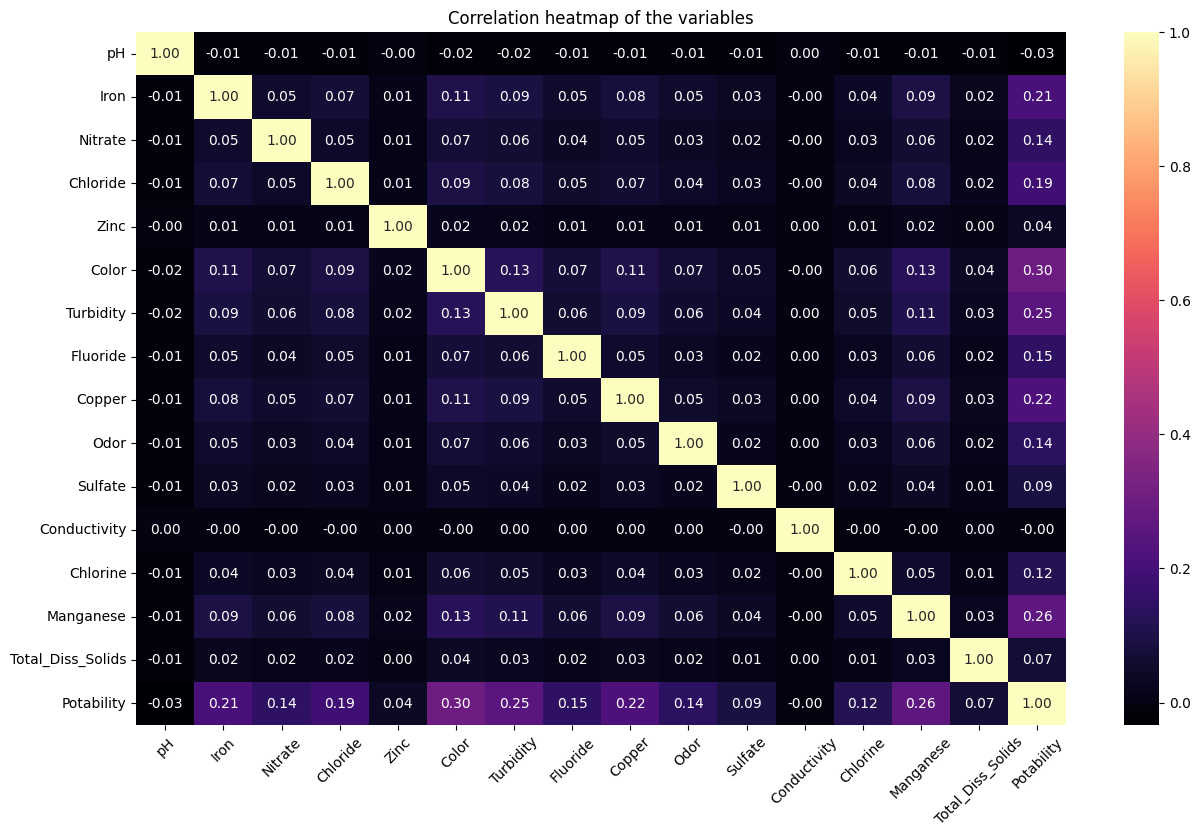

In [30]:
df_corr = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(df_corr, annot = True, cmap = 'magma', fmt = '.2f')
plt.title('Correlation heatmap of the variables')
plt.xticks(rotation = 45)
plt.show()

No big correlations between variables, so we'll keep them all. 
It seems that Color and Turbidity have one of the highest correlation with Potability: this was somewhat expected, because even in our daily life we are suspicious of water that isn't transparent or seems turbid.
We can better check the relation between Color and Potability thanks to a graph.

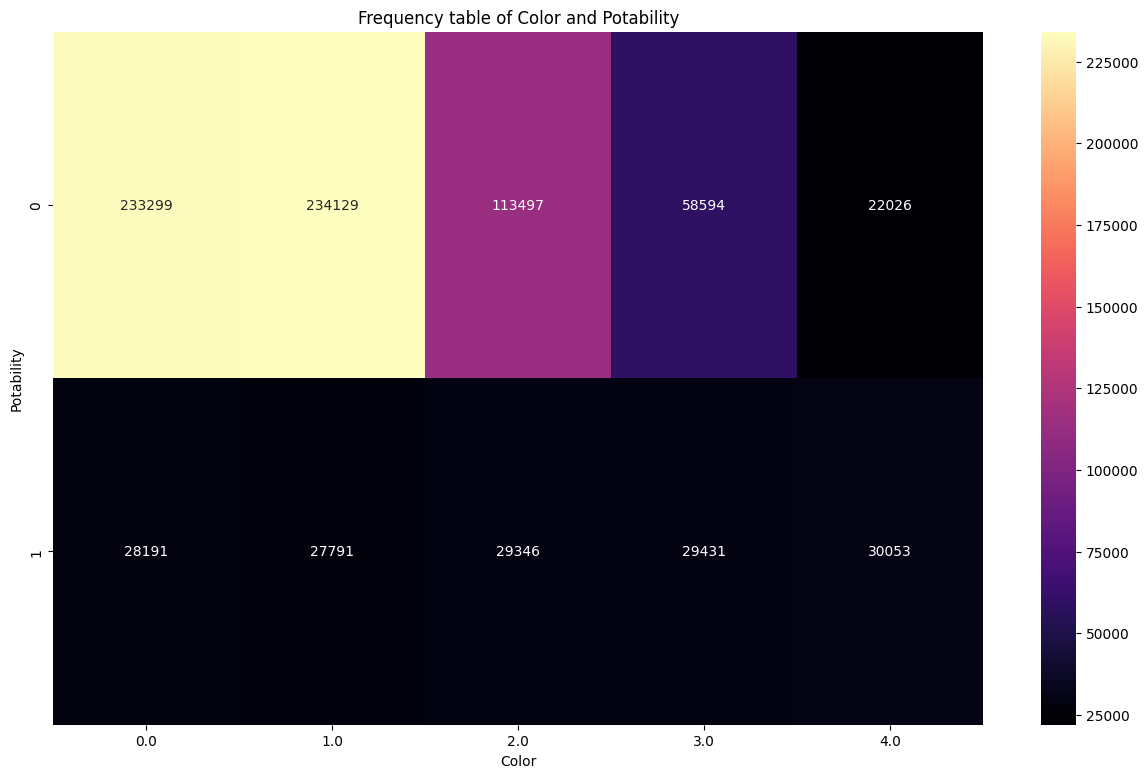

In [50]:
plt.figure(figsize = (15,9))
plt.title('Frequency table of Color and Potability')
frequency_table = pd.crosstab(df['Potability'], df['Color'])
sns.heatmap(frequency_table, annot = True, fmt = 'd', cmap = 'magma')
plt.show()

Another "relevant" correlation might be between Manganese and Turbidity

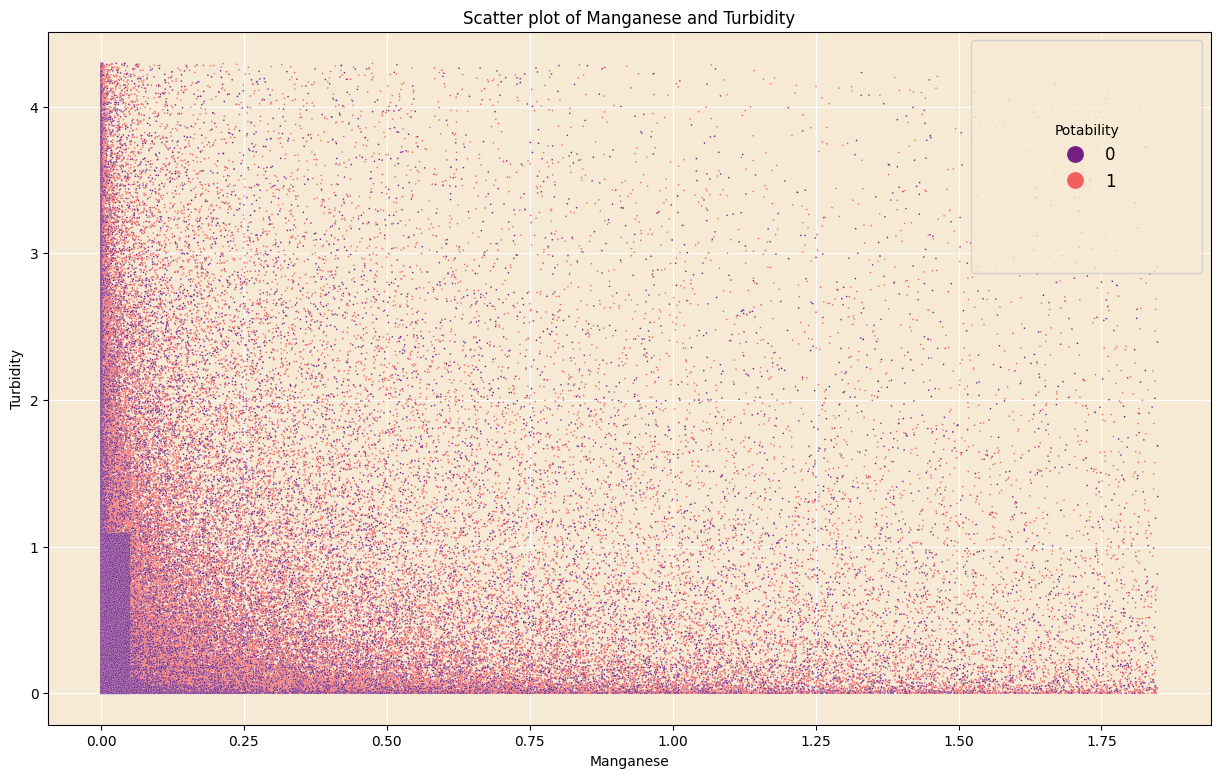

In [48]:
plt.figure(figsize = (15, 9))
plt.title('Scatter plot of Manganese and Turbidity')
sns.scatterplot(data = df, x = 'Manganese', y = 'Turbidity', hue = 'Potability', palette = 'magma', s = 1.5)
plt.legend(loc = 'upper right', fontsize = 'large', markerscale = 10, borderpad = 5, title = 'Potability')
plt.show()

Potable water usually has very low levels of Manganese and Turbidity levels between 0 and 1

Also, it might be important to check the correlation between Color and Turbidity since in theory they should be correlated.

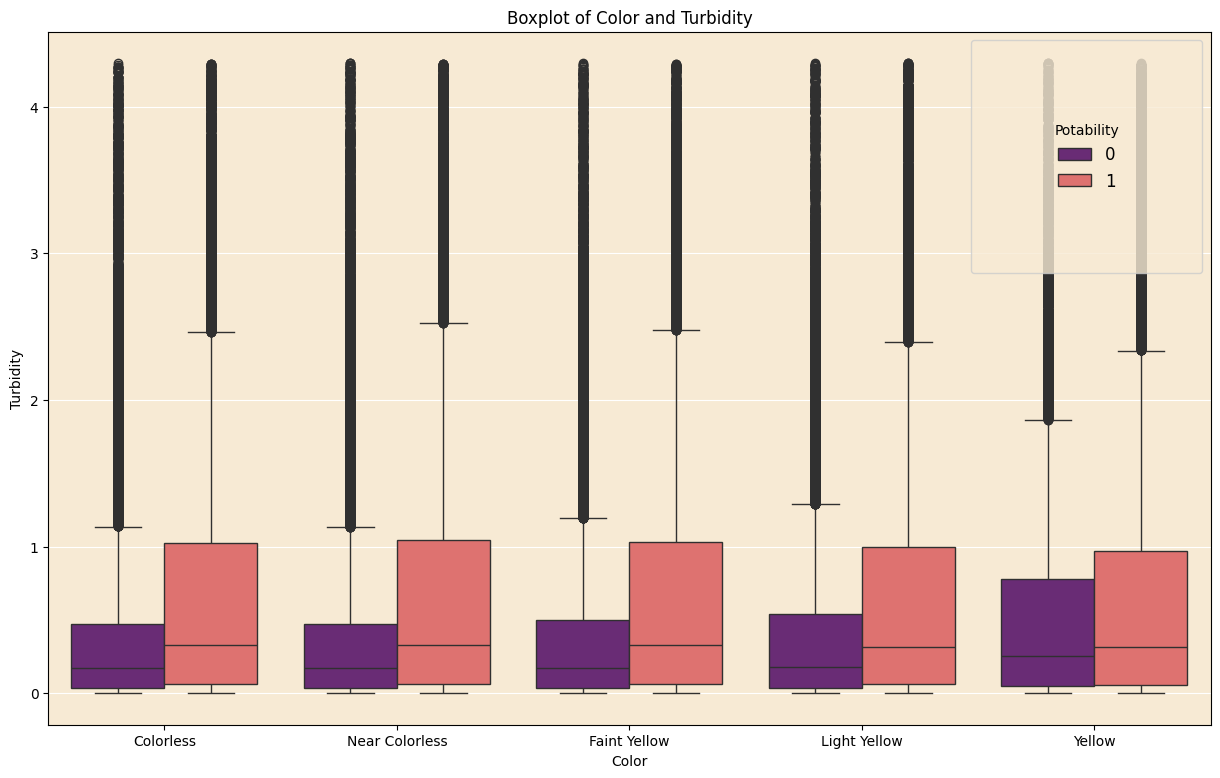

In [49]:
plt.figure(figsize = (15, 9))
plt.title('Boxplot of Color and Turbidity')
sns.boxplot(data = df, x = 'Color', y = 'Turbidity', hue = 'Potability', palette = 'magma')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow', 'Yellow'])
plt.legend(loc = 'upper right', fontsize = 'large', markerscale = 10, borderpad = 5, title = 'Potability')
plt.show()

For better understanding of the variables distributions, we can check their relative violin plot.

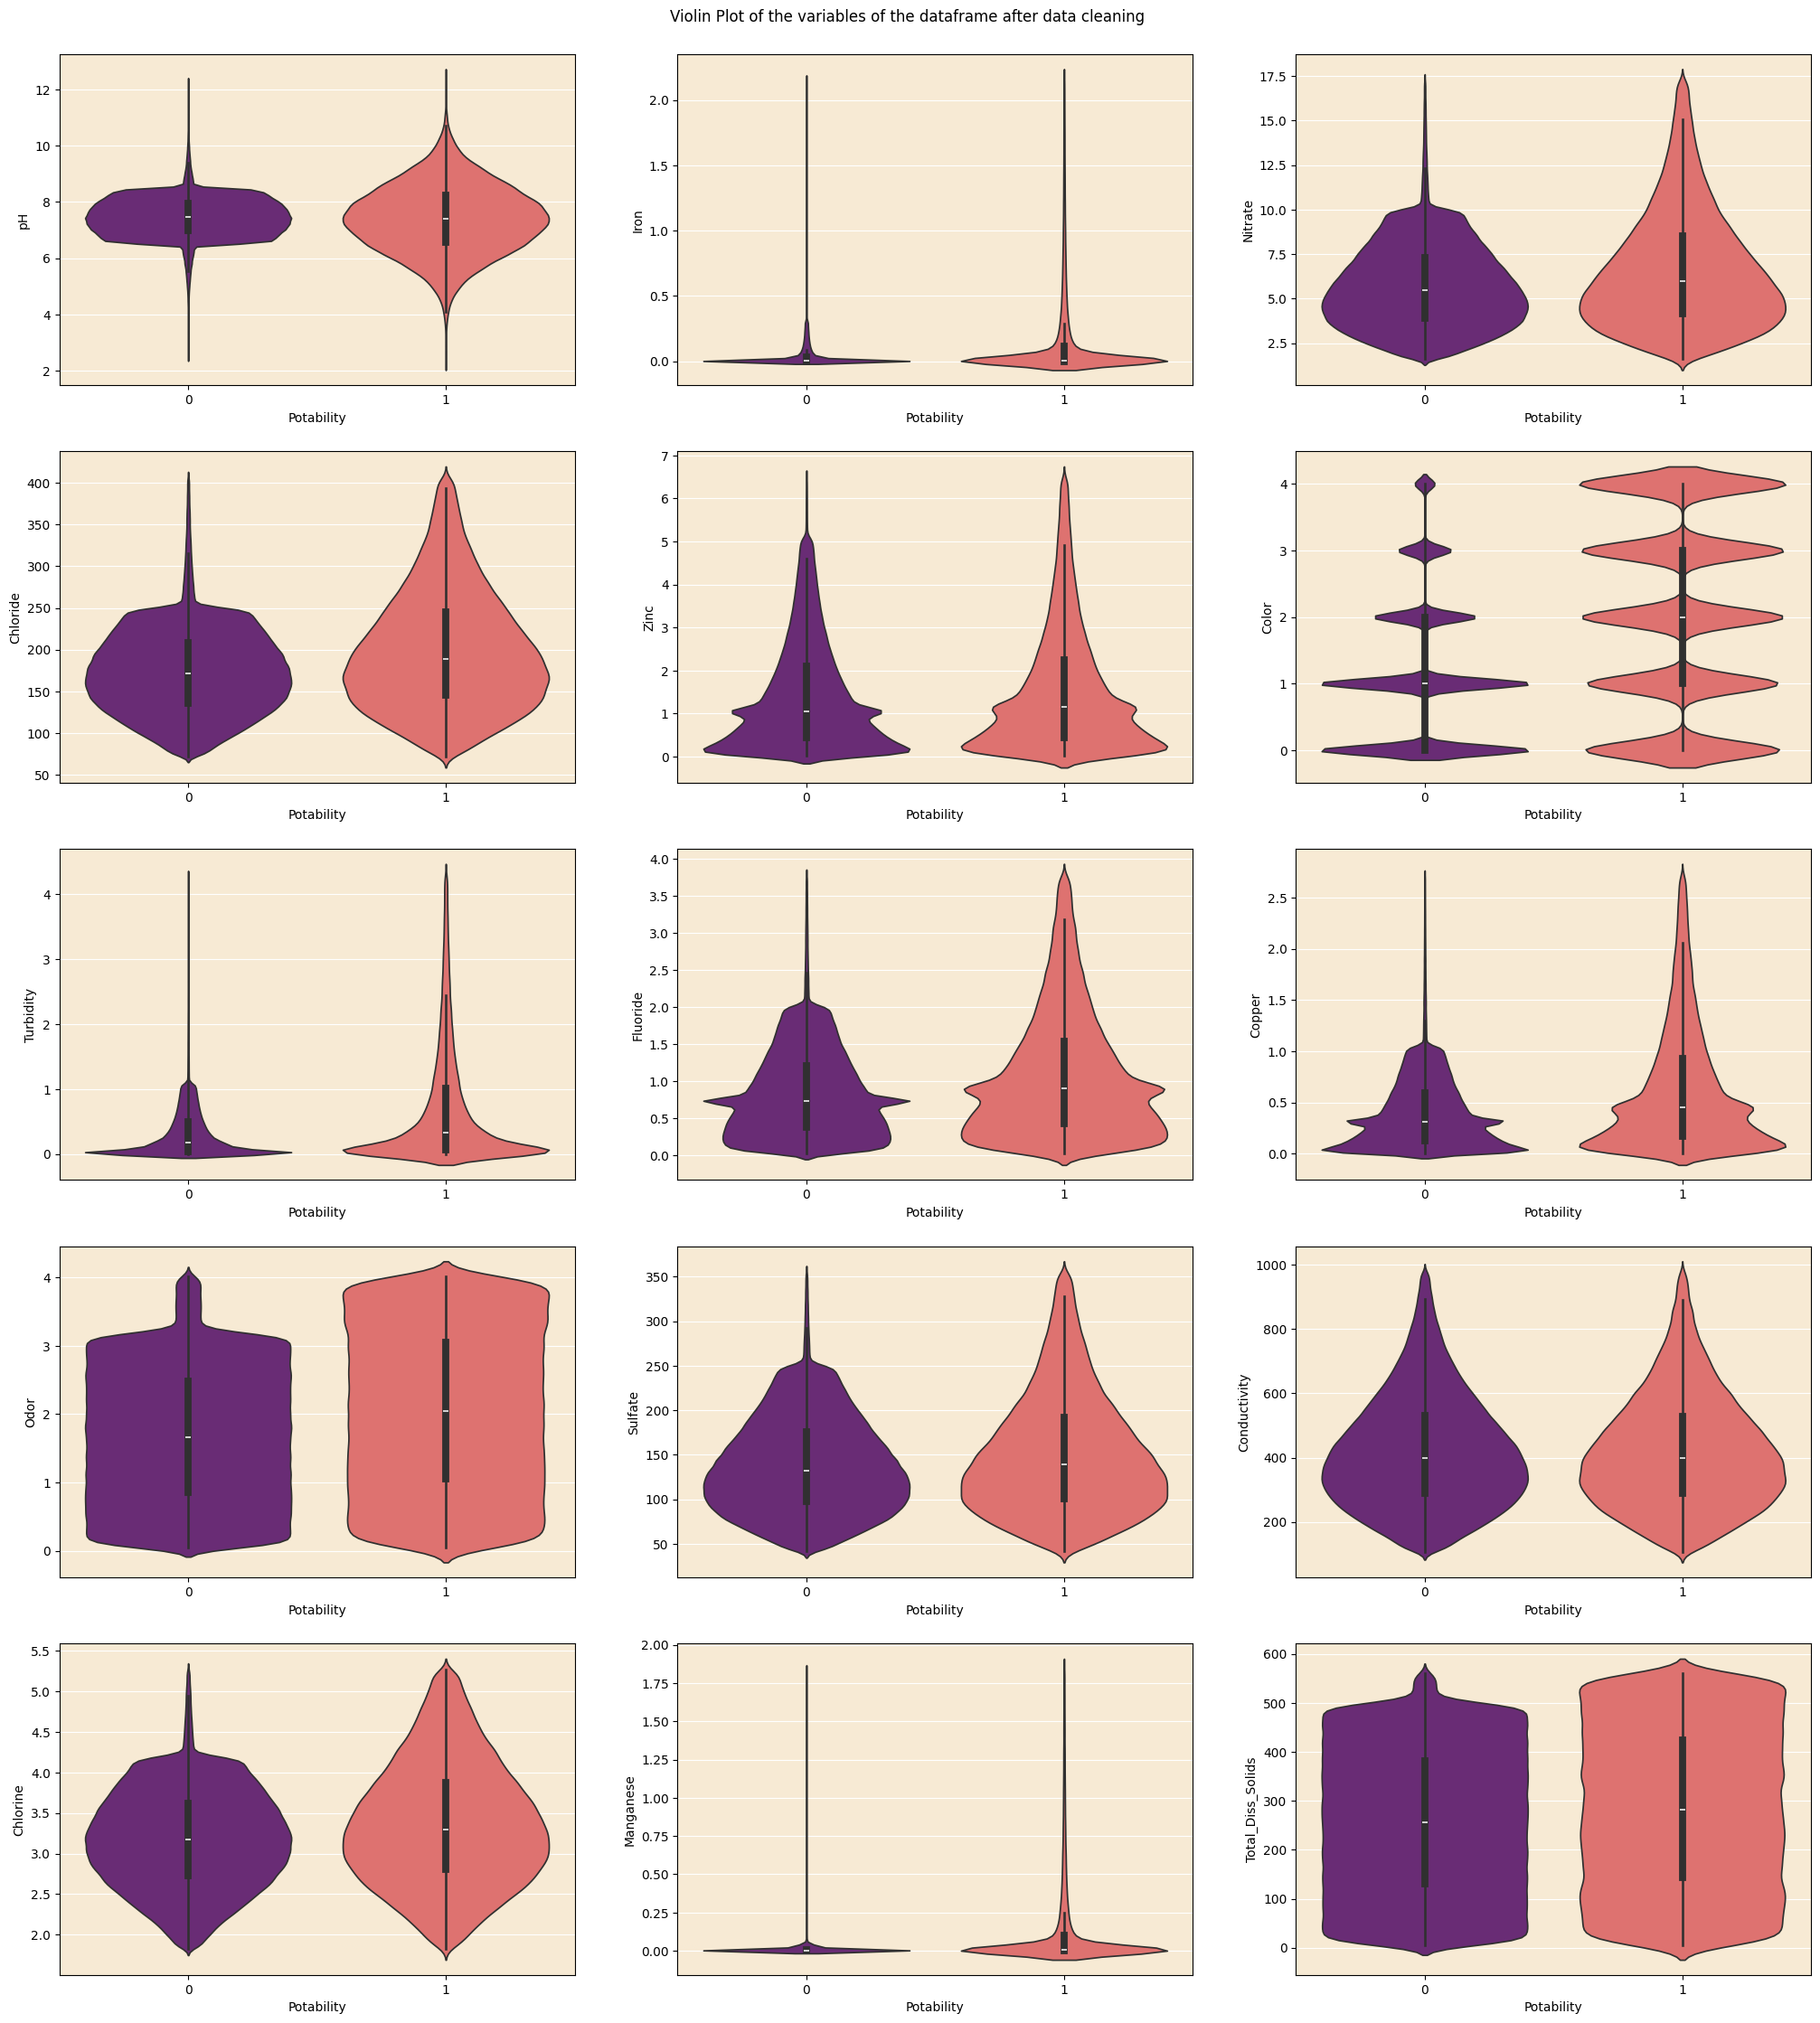

In [112]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
plt.suptitle('Violin Plot of the variables of the dataframe after data cleaning')
fig_1.subplots_adjust(top = 0.96)

sns.violinplot(x = 'Potability', y = 'pH', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[0][0])
sns.violinplot(x = 'Potability', y = 'Iron', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[0][1])
sns.violinplot(x = 'Potability', y = 'Nitrate', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[0][2])
sns.violinplot(x = 'Potability', y = 'Chloride', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[1][0])
sns.violinplot(x = 'Potability', y = 'Zinc', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[1][1])
sns.violinplot(x = 'Potability', y = 'Color', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[1][2])
sns.violinplot(x = 'Potability', y = 'Turbidity', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[2][0])
sns.violinplot(x = 'Potability', y = 'Fluoride', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[2][1])
sns.violinplot(x = 'Potability', y = 'Copper', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[2][2])
sns.violinplot(x = 'Potability', y = 'Odor', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[3][0])
sns.violinplot(x = 'Potability', y = 'Sulfate', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[3][1])
sns.violinplot(x = 'Potability', y = 'Conductivity', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[3][2])
sns.violinplot(x = 'Potability', y = 'Chlorine', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[4][0])
sns.violinplot(x = 'Potability', y = 'Manganese', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[4][1])
sns.violinplot(x = 'Potability', y = 'Total_Diss_Solids', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[4][2])

plt.show()

## Balancing the dataset respecting of "Potability" column

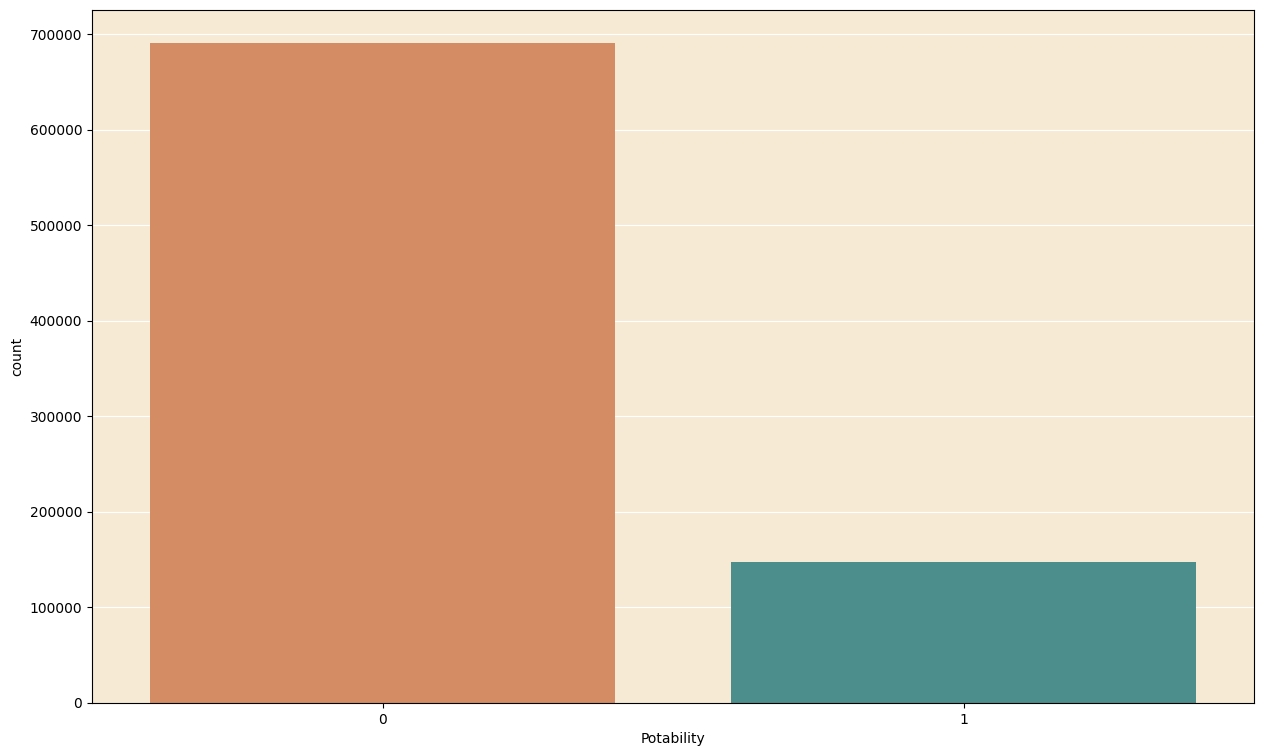

In [366]:
palette1 = ['#E68753', '#409996']
plt.figure(figsize = (15, 9))
sns.countplot(x = df['Potability'], data = df, palette = palette1, hue = df['Potability'], legend = False)
plt.show()

In [367]:
X = df.drop(columns = ['Potability'])
y = df['Potability']

In [368]:
rus = RandomUnderSampler(random_state = 1)

In [369]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [370]:
df = pd.concat([pd.DataFrame(X_resampled, columns = X.columns), pd.Series(y_resampled, name = 'Potability')], axis=1)
df.reset_index(drop = True, inplace = True)

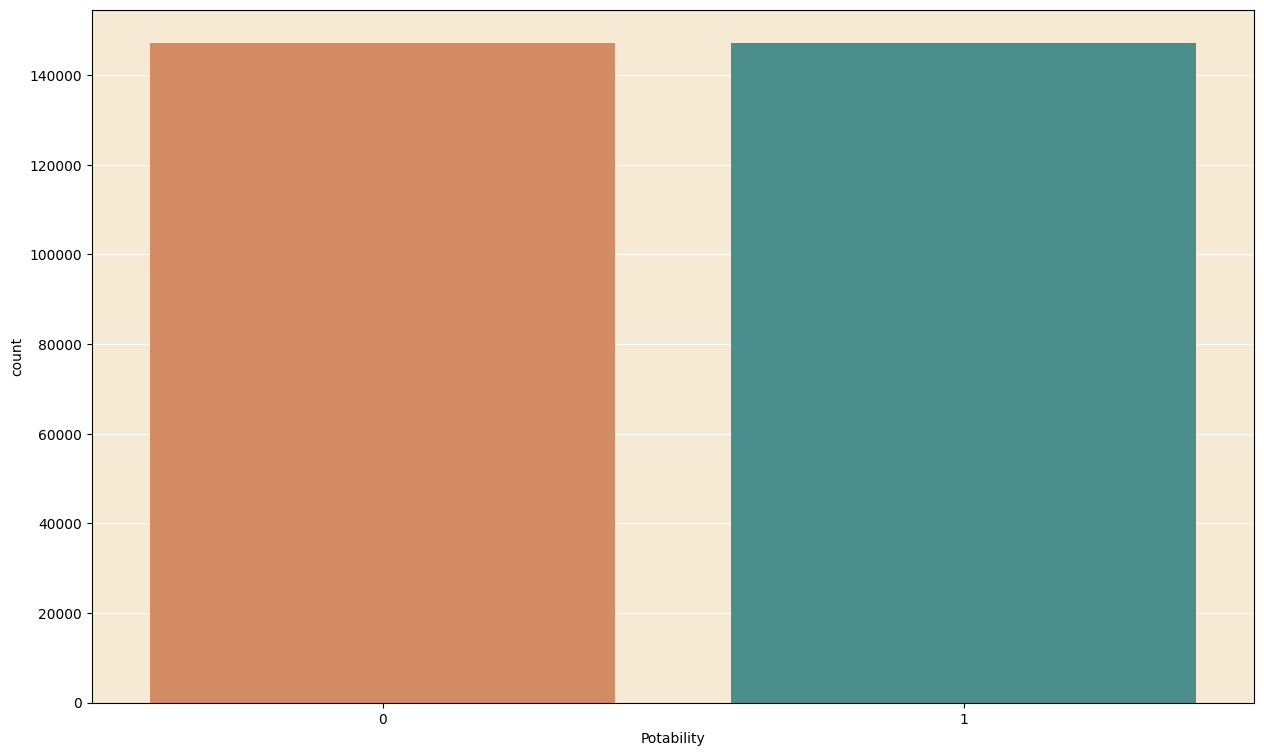

In [371]:
plt.figure(figsize = (15, 9))
ax = sns.countplot(x = df['Potability'], data = df, palette = palette1, hue = df['Potability'], legend = False)
plt.show()

## Split the data in train and test

In [372]:
df1 = df.copy()
df1 = df1.sample(frac = 1, random_state = 1)

In [373]:
df1 = df1[:20000]

In [374]:
X = df.drop('Potability', axis = 1)
y = df['Potability']
X1 = df1.drop('Potability', axis = 1)
y1 = df1['Potability']

In [375]:
print(y1.value_counts())
print(X1.shape)

Potability
0    10027
1     9973
Name: count, dtype: int64
(20000, 15)


In [376]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 15), (6000, 15), (14000,), (6000,))

In [377]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train_full.shape, X_test_full.shape, y_train_full.shape, y_test_full.shape

((206141, 15), (88347, 15), (206141,), (88347,))

## Predict the potability of the water

### SVM model

In [378]:
clf_svm = svm.SVC(random_state = 1)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [379]:
f1_score_svm = f1_score(y_test, y_pred_svm, average = None, labels = [0, 1])
print(f'F1 score for the svm model applied to the dataset: {f1_score_svm[0] * 100:.2f}%, {f1_score_svm[1] * 100:.2f}%')

F1 score for the svm model applied to the dataset: 71.93%, 56.20%


Not the best score for our model, we'll try to improve that by standardizing the train dataset with a pipeline. 

In [380]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [381]:
pipe_svm = make_pipeline(StandardScaler(), clf_svm)
clf_svm.fit(X_train, y_train)
y_pred_pipe_svm = clf_svm.predict(X_test)

In [382]:
f1_score_pipe_svm = f1_score(y_test, y_pred_pipe_svm, average = None, labels = [0, 1])
print(f'F1 score for the pipeline svm model applied to the dataset: {f1_score_pipe_svm[0] * 100:.2f}%, {f1_score_pipe_svm[1] * 100:.2f}%')
print(classification_report(y_test, y_pred_pipe_svm))

F1 score for the pipeline svm model applied to the dataset: 88.92%, 88.94%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3038
           1       0.88      0.90      0.89      2962

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



In [ ]:
y_pred_full_svm = pipe_svm.predict(X_test_full)
f1_score_full_svm = f1_score(y_test_full, y_pred_full_svm, average = None, labels = [0, 1])
print(f'F1 score for the svm model applied to the full dataset: {f1_score_full_svm[0] * 100:.2f}%, {f1_score_full_svm[1] * 100:.2f}%')
print(classification_report(y_test_full, y_pred_full_svm))

F1 score for the svm model applied to the full dataset: 86.46%, 86.05%
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     44275
           1       0.87      0.85      0.86     44039

    accuracy                           0.86     88314
   macro avg       0.86      0.86      0.86     88314
weighted avg       0.86      0.86      0.86     88314



In [ ]:
with open('./models/potability_classifier_svm.pkl', 'wb') as f:
    pickle.dump(pipe_svm, f)

### Logistic Regression model

In [ ]:
clf_log = LogisticRegression(max_iter = 10000, random_state = 1)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

In [ ]:
f1_score_log = f1_score(y_test, y_pred_log, average = None, labels = [0, 1])
solver0 = clf_log.get_params()['solver']
C0 = clf_log.get_params()['C']
penalty0 = clf_log.get_params()['penalty']

Grid search for lbfgs, newton-cg, sag, newton-cholesky, liblinear and saga

In [ ]:
grid1 = {'solver' : ['lbfgs', 'newton-cg', 'sag', 'newton-cholesky', 'liblinear', 'saga']}
clf_log_cv1 = GridSearchCV(clf_log, grid1, cv = 3, scoring = 'f1')
clf_log_cv1.fit(X_train, y_train)
bestpar_solver_log = clf_log_cv1.best_params_['solver']
print(f'Best solver paramenter: {bestpar_solver_log}')

Best solver paramenter: lbfgs


Grid search for "penalty" and "C" parameter

In [ ]:
grid2 = {'penalty' : ['l1', 'l2'],
        'C' : np.logspace(-3,3,7)}
clf_log_cv2 = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 10000), grid2, cv = 3, scoring = 'f1', error_score = 'raise')
clf_log_cv2.fit(X_train, y_train)
pipe_log2 = make_pipeline(StandardScaler(), clf_log_cv2)
pipe_log2.fit(X_train, y_train)
y_pred_pipe_log = pipe_log2.predict(X_test)
f1_score_pipe_log = f1_score(y_test, y_pred_pipe_log, average = None, labels = [0, 1])
bestpar_C_log = clf_log_cv2.best_params_['C']
bestpar_penalty_log = clf_log_cv2.best_params_['penalty']
print(f'Best C parameter: {bestpar_C_log}\nBest penalty paramenter: {bestpar_penalty_log}')

Best C parameter: 1.0
Best penalty paramenter: l2


In [ ]:
print(f'F1 score for the logistic regression model with standard parameters (solver-->{solver0}, C-->{C0}, penalty-->{penalty0}): {f1_score_log[0] * 100:.2f}%, {f1_score_log[1] * 100:.2f}%')
print(f'F1 score for the pipeline logistic regression model with solver-->"{bestpar_solver_log}", C-->"{bestpar_C_log}", penalty-->"{bestpar_penalty_log}" after hyperparameter tuning: {f1_score_pipe_log[0] * 100:.2f}%, {f1_score_pipe_log[1] * 100:.2f}%')

F1 score for the logistic regression model with standard parameters (solver-->lbfgs, C-->1.0, penalty-->l2): 80.53%, 78.06%
F1 score for the pipeline logistic regression model with solver-->"lbfgs", C-->"1.0", penalty-->"l2" after hyperparameter tuning: 80.58%, 78.11%


Differences between the logistic regression model with standard parameters and the same model after hyperparameter tuning aren't really significant, we'll use the latter for the prediction on the full dataset.

In [ ]:
main_pipe_log = pipe_log2
y_pred_full_log = main_pipe_log.predict(X_test_full)
f1_score_full_log = f1_score(y_test_full, y_pred_full_log, average = None, labels = [0, 1])
print(f'F1 score for the logistic regression model applied to the full dataset: {f1_score_full_log[0] * 100:.2f}%, {f1_score_full_log[1] * 100:.2f}%')
print(classification_report(y_test_full, y_pred_full_log))

F1 score for the logistic regression model applied to the full dataset: 80.19%, 78.38%
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     44275
           1       0.82      0.75      0.78     44039

    accuracy                           0.79     88314
   macro avg       0.80      0.79      0.79     88314
weighted avg       0.80      0.79      0.79     88314



In [ ]:
with open('./models/potability_classifier_log.pkl', 'wb') as f:
    pickle.dump(main_pipe_log, f)

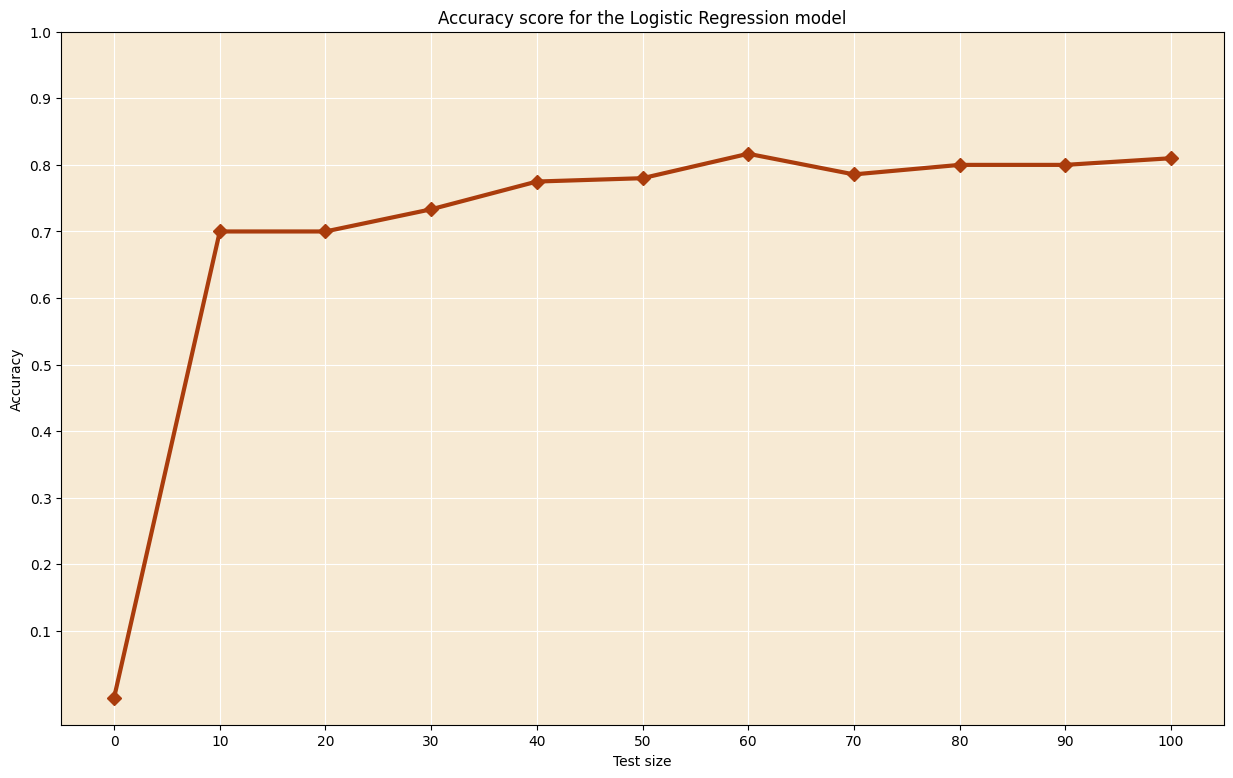

In [97]:
plt.figure(figsize = (15, 9))
plt.title('Accuracy score for the Logistic Regression model')
plt.plot([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], [0, 0.7, 0.7, 0.7333, 0.775, 0.78, 0.8167, 0.7857, 0.8, 0.8, 0.81], color = '#aa3c0c', linewidth = 3, marker = 'D', markersize = 7)
plt.ylabel('Accuracy')
plt.xlabel('Test size')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

rifare i grafici per l'accuracy, zommare con yticks, togliere il titolo perchè c'è la caption su streamlit

sistemare pd.info() su streamlit

rifare i boxplot con palette 'magma'